# Relax inc. 





takehome_user_engagement.csv

takehome_user.csv  - 12,000 user who signed up for the product in the last two years.

### Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

## - We suggest spending 1­-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
    ● name: the user's name
    ● object_id: the user's id
    ● email: email address
    ● creation_source: how their account was created. This takes on one
        of 5 values:
        ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
        ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login
id)



    ● creation_time: when they created their account
    ● last_session_creation_time: unix timestamp of last login
    ● opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    ● enabled_for_marketing_drip: whether they are on the regular marketing email drip
    ● org_id: the organization (group of users) they belong to
    ● invited_by_user_id: which user invited them to join (if applicable).


## - identify which factors predict future user adoption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import datetime 
import seaborn as sns

## Load the data

In [2]:
df = pd.read_csv('takehome_users.csv')

df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [4]:
df.shape

(12000, 10)

In [5]:
df_engagement = pd.read_csv('takehome_user_engagement.csv')

df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [7]:
df_engagement.shape

(207917, 3)

# Step 1

## Pseudo Code:

- Rename object_id to user_id to facilitate joining of tables 

- Join the two tables on user_id 

- Change last_session_creating_time from unix timestamp of login to year-month-day-hour-mins-seconds.

- rename last_session_creating_time to'last_login_time'.
 



In [8]:
#rename object_id to user_id to prepare to join tables.
df.rename(columns={'object_id': 'user_id'},inplace=True)

In [9]:
#Change last_session_creating_time from unix to datetime
df['last_login_time'] = pd.to_datetime(df['last_session_creation_time'], unit='s')

In [10]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-22 10:14:20


In [11]:
df.drop(columns='last_session_creation_time', inplace=True)

In [12]:
df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20


In [13]:
#Check for duplicates 
duplicate_count = df.duplicated().sum()

print(duplicate_count)

0


In [14]:
#Check missing values
df.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
last_login_time               3177
dtype: int64

### Observations: invited_by_user_id column has 5583 users who were not invited to the platform by an active user but joined platform either through word of mouth or marketing. 



### last_login_time has 3177 values that are missing. This is worth exploring in EDA as this might be a signal and this should be explored before trying imputation methods as this represents a significant part of the data in that column.

A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:
    ● name: the user's name
    ● object_id: the user's id
    ● email: email address
    ● creation_source: how their account was created. This takes on one
        of 5 values:
        ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
        ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login
id)



    ● creation_time: when they created their account
    ● last_session_creation_time: unix timestamp of last login
    ● opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    ● enabled_for_marketing_drip: whether they are on the regular marketing email drip
    ● org_id: the organization (group of users) they belong to
    ● invited_by_user_id: which user invited them to join (if applicable).

# EDA df

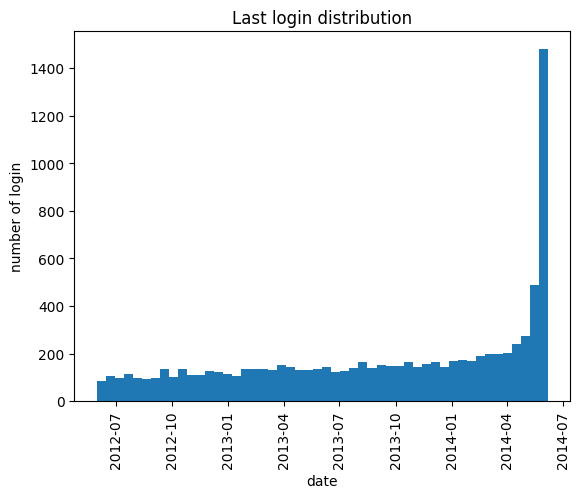

In [15]:
last_login = df['last_login_time']

_ = plt.hist(last_login, bins=50)
_ = plt.xlabel('date')
_ = plt.ylabel('number of login')
_ = plt.xticks(rotation=90)
_ = plt.title('Last login distribution')

### Observations: Last login represents the last time user engaged with platform. The reason for higher number of logins towards the right is that these are users who are still logging in. This is skewed right and there are members who have stopped engaging with platform. 

In [16]:
df['invited_by_user_id'].head()

0    10803.0
1      316.0
2     1525.0
3     5151.0
4     5240.0
Name: invited_by_user_id, dtype: float64

In [17]:
df['invited_by_user_id'].value_counts()

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: count, Length: 2564, dtype: int64

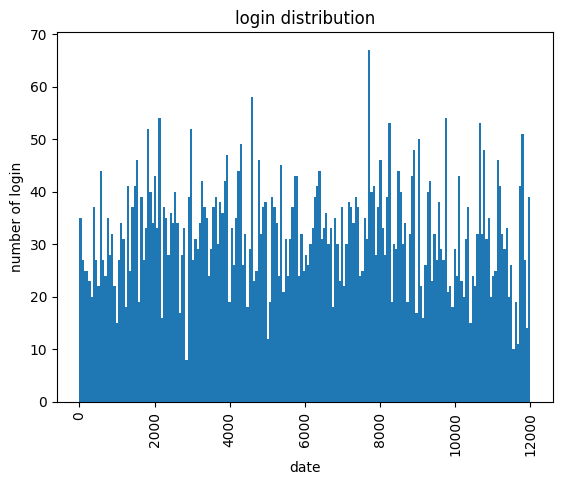

In [18]:
invited_log = df['invited_by_user_id']

_ = plt.hist(invited_log, bins=200)
_ = plt.xlabel('date')
_ = plt.ylabel('number of login')
_ = plt.xticks(rotation=90)
_ = plt.title('login distribution')

In [19]:
df['invited_by_user_id'].dtypes

dtype('float64')

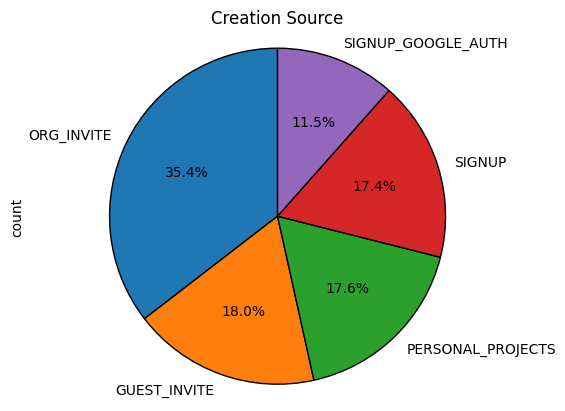

In [20]:
#use pie chart for better visualization 
grouped_data = df['creation_source'].value_counts()

grouped_data.plot(kind='pie',labels=['ORG_INVITE', 'GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'], autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'black'})



plt.title('Creation Source')

plt.axis('equal')

plt.show()

# EDA df_engagement 

In [21]:
df_engagement.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [22]:
df_engagement['time_stamp'].min()

'2012-05-31 08:20:06'

In [23]:
df_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [24]:
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])

In [116]:
# Step 2: Group by 'time_stamp' and sum the 'visited' column
grouped_df = df_engagement.groupby('time_stamp', as_index=False)['visited'].sum()

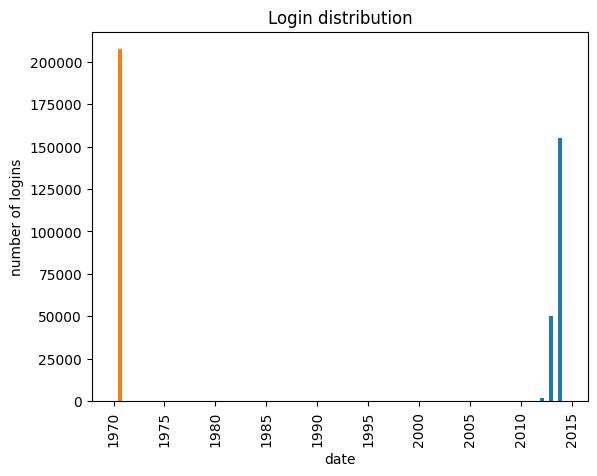

In [117]:


_ = plt.hist(grouped_df, bins=50)
_ = plt.xlabel('date')
_ = plt.ylabel('number of logins')
_ = plt.xticks(rotation=90)
_ = plt.title('Login distribution')

# Step 2

## Pseudo Code:

- Data maninpulation: Transform date in numeric form to date time object. 

- Feature engineering: Create 'adopted user' column by identifying users who have logged into the product 3 seperate days in AT LEAST one 7 day period. 

- EDA: Use visualization to find trends in login times (Hours, Days, Weeks, Months). 

In [27]:
df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20


In [28]:
df.dtypes

user_id                                int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
last_login_time               datetime64[ns]
dtype: object

In [29]:
df['creation_source'].value_counts()

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

In [30]:
#change last_login_time to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])

In [31]:
df['last_login_time'] = pd.to_datetime(df['last_login_time'])

In [32]:
df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,2013-01-22 10:14:20


## Feature engineering on df_engagement 

In [124]:
df_engagement.head()

,user_id,visited,has_3_visits,15_min_interval,day_of_week,month
time_stamp,,,,,,
2014-04-22 03:53:30,1,1,False,2014-04-22 03:45:00,1,4
2013-11-15 03:45:04,2,1,False,2013-11-15 03:45:00,4,11
2013-11-29 03:45:04,2,1,False,2013-11-29 03:45:00,4,11
2013-12-09 03:45:04,2,1,False,2013-12-09 03:45:00,0,12
2013-12-25 03:45:04,2,1,False,2013-12-25 03:45:00,2,12


In [123]:
df_engagement.columns

Index(['user_id', 'visited', 'has_3_visits', '15_min_interval', 'day_of_week',
       'month'],
      dtype='object')

In [34]:
df_engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [35]:
df_engagement['user_id'].value_counts()

user_id
3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: count, Length: 8823, dtype: int64

In [136]:
df_engagement.reset_index(inplace=True)

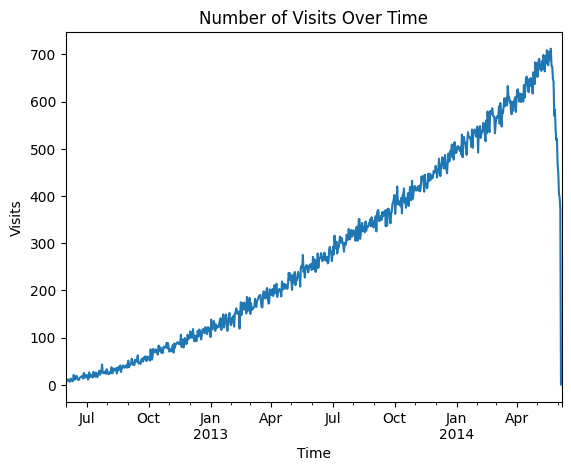

In [134]:
df_engagement.set_index('time_stamp', inplace=True)

# Aggregate the visits by timestamp 
visits_over_time = df_engagement['visited'].resample('D').sum()  # daily aggregation

# Plot the data
visits_over_time.plot(kind='line', title='Number of Visits Over Time')
plt.xlabel('Time')
plt.ylabel('Visits')
plt.show()

In [36]:

def find_frequent_visitors(df_engagement):
    """
    Find users who visited on 3+ separate days within any 7-day rolling window
    and add the 'has_3_visits' column to the input dataframe.
    """
    # Prepare the data
    df_e2 = df_engagement.copy()
    df_e2['time_stamp'] = pd.to_datetime(df_e2['time_stamp'])
    df_e2 = df_e2.sort_values(['user_id', 'time_stamp'])

    # Step 2: Analyze rolling window for each user
    def check_window_optimized(user_data):
        user_data = user_data.set_index('time_stamp')  # Use time_stamp as index for rolling
        user_data['rolling_7d_visits'] = (
            user_data['visited']
            .rolling('7D')  # Time-based rolling window
            .sum()  # Sum visits within the rolling window
        )
        return user_data.reset_index()

    # Apply rolling window analysis for each user
    df_e2 = df_e2.groupby('user_id', group_keys=False).apply(check_window_optimized)

    # Step 3: Add the 'has_3_visits' column
    df_e2['has_3_visits'] = df_e2['rolling_7d_visits'] >= 3

    # Merge the 'has_3_visits' column back into the original DataFrame
    df_engagement['has_3_visits'] = df_e2['has_3_visits'].reset_index(drop=True)

    # Return only the updated DataFrame
    return df_engagement


In [37]:
# Run the function and update df_engagement
df_engagement = find_frequent_visitors(df_engagement)


/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_78472/2774742115.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_e2 = df_e2.groupby('user_id', group_keys=False).apply(check_window_optimized)


In [38]:
df_engagement.head()

,time_stamp,user_id,visited,has_3_visits
0,2014-04-22 03:53:30,1,1,False
1,2013-11-15 03:45:04,2,1,False
2,2013-11-29 03:45:04,2,1,False
3,2013-12-09 03:45:04,2,1,False
4,2013-12-25 03:45:04,2,1,False


In [39]:
df_engagement['has_3_visits'].value_counts()

has_3_visits
True     160522
False     47395
Name: count, dtype: int64

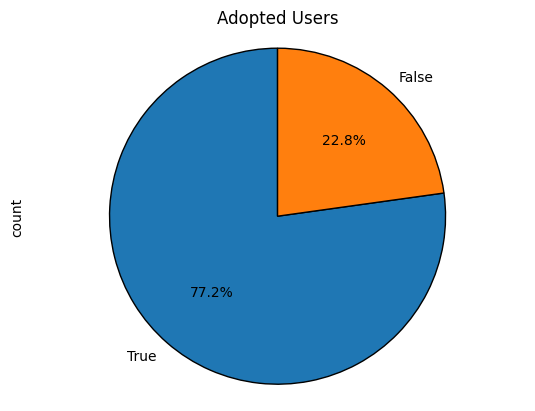

In [109]:
#use pie chart for better visualization 
grouped_3_visits = df_engagement['has_3_visits'].value_counts()

grouped_3_visits.plot(kind='pie',labels=['True','False'], autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'black'})



plt.title('Adopted Users')

plt.axis('equal')

plt.show()

In [141]:
#Find trends in times of day

#round down to nearest 15 min interval
df_engagement['15_min_interval'] = df_engagement['time_stamp'].dt.floor('30min')

In [143]:
df_engagement.tail()

,time_stamp,user_id,visited,has_3_visits,15_min_interval,day_of_week,month
207912,2013-09-06 06:14:15,11996,1,False,2013-09-06 06:00:00,4,9
207913,2013-01-15 18:28:37,11997,1,False,2013-01-15 18:00:00,1,1
207914,2014-04-27 12:45:16,11998,1,False,2014-04-27 12:30:00,6,4
207915,2012-06-02 11:55:59,11999,1,False,2012-06-02 11:30:00,5,6
207916,2014-01-26 08:57:12,12000,1,False,2014-01-26 08:30:00,6,1


In [144]:
df_engagement.dtypes

time_stamp         datetime64[ns]
user_id                     int64
visited                     int64
has_3_visits                 bool
15_min_interval    datetime64[ns]
day_of_week                 int32
month                       int32
dtype: object

In [145]:
df_engagement.head()

,time_stamp,user_id,visited,has_3_visits,15_min_interval,day_of_week,month
0,2014-04-22 03:53:30,1,1,False,2014-04-22 03:30:00,1,4
1,2013-11-15 03:45:04,2,1,False,2013-11-15 03:30:00,4,11
2,2013-11-29 03:45:04,2,1,False,2013-11-29 03:30:00,4,11
3,2013-12-09 03:45:04,2,1,False,2013-12-09 03:30:00,0,12
4,2013-12-25 03:45:04,2,1,False,2013-12-25 03:30:00,2,12


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

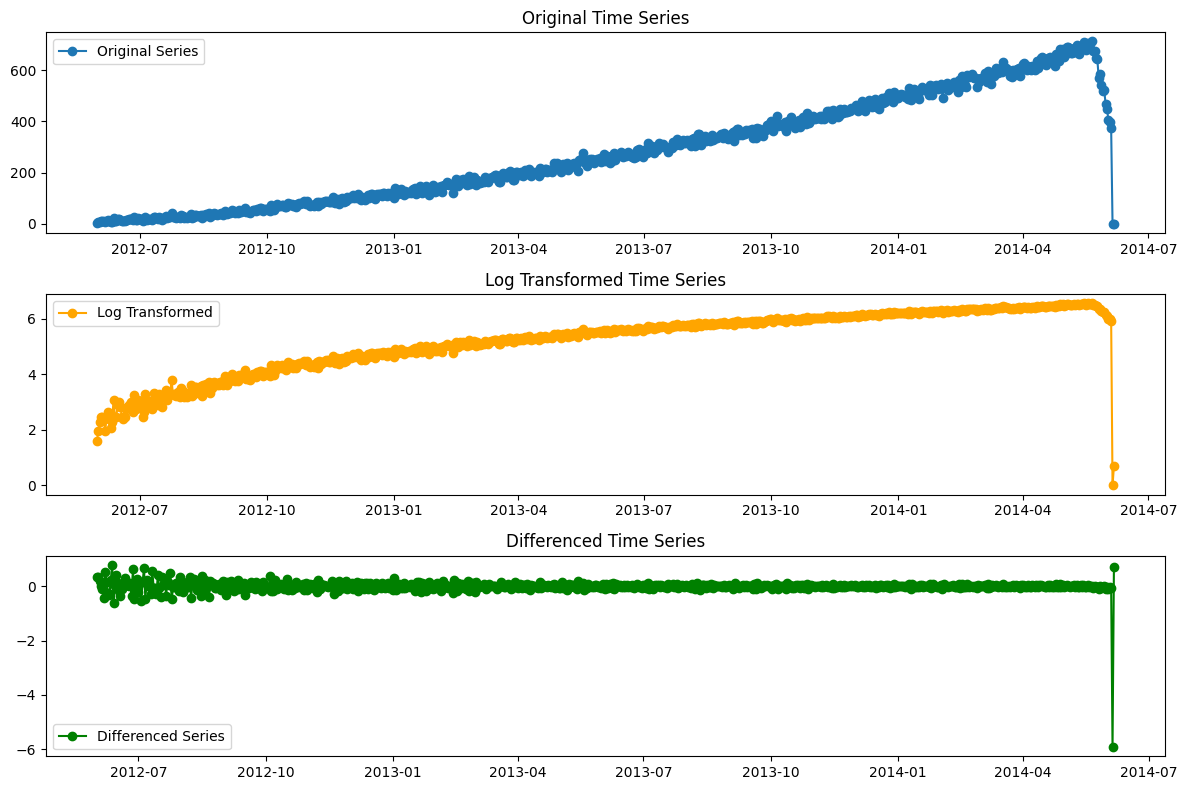


ADF Test: Original Series
ADF Statistic: -4.797393062132256
p-value: 5.5013899152033594e-05
Critical Values: {'1%': -3.439516060164992, '5%': -2.8655850998755263, '10%': -2.5689240826597173}
The time series is stationary.

ADF Test: Log Transformed Series
ADF Statistic: 5.266872745927229
p-value: 1.0
Critical Values: {'1%': -3.439516060164992, '5%': -2.8655850998755263, '10%': -2.5689240826597173}
The time series is NOT stationary.

ADF Test: Differenced Series
ADF Statistic: 5.959310986768512
p-value: 1.0
Critical Values: {'1%': -3.439464954327953, '5%': -2.8655625802683473, '10%': -2.5689120852623457}
The time series is NOT stationary.

ADF Test: Detrended Series
ADF Statistic: 5.946380733152669
p-value: 1.0
Critical Values: {'1%': -3.439464954327953, '5%': -2.8655625802683473, '10%': -2.5689120852623457}
The time series is NOT stationary.


In [47]:
# Resample to Daily Counts
time_series = df_engagement.set_index('time_stamp').resample('D').size()

# Step 1: Log Transformation
log_series = np.log1p(time_series)  # Use log1p to handle zeros

# Step 2: Differencing
diff_series = log_series.diff().dropna()

# Step 3: Subtract Moving Average
moving_avg = log_series.rolling(window=3).mean()
detrended_series = (log_series - moving_avg).dropna()

# Step 4: ADF Test Function
def adf_test(series, title):
    print(f"\nADF Test: {title}")
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is NOT stationary.")

# Visualize and Test
plt.figure(figsize=(12, 8))

# Original Series
plt.subplot(3, 1, 1)
plt.plot(time_series, label='Original Series', marker='o')
plt.title('Original Time Series')
plt.legend()

# Log Transformed
plt.subplot(3, 1, 2)
plt.plot(log_series, label='Log Transformed', color='orange', marker='o')
plt.title('Log Transformed Time Series')
plt.legend()

# Differenced
plt.subplot(3, 1, 3)
plt.plot(diff_series, label='Differenced Series', color='green', marker='o')
plt.title('Differenced Time Series')
plt.legend()

plt.tight_layout()
plt.show()

# ADF Tests
adf_test(time_series, "Original Series")
adf_test(log_series, "Log Transformed Series")
adf_test(diff_series, "Differenced Series")
adf_test(detrended_series, "Detrended Series")

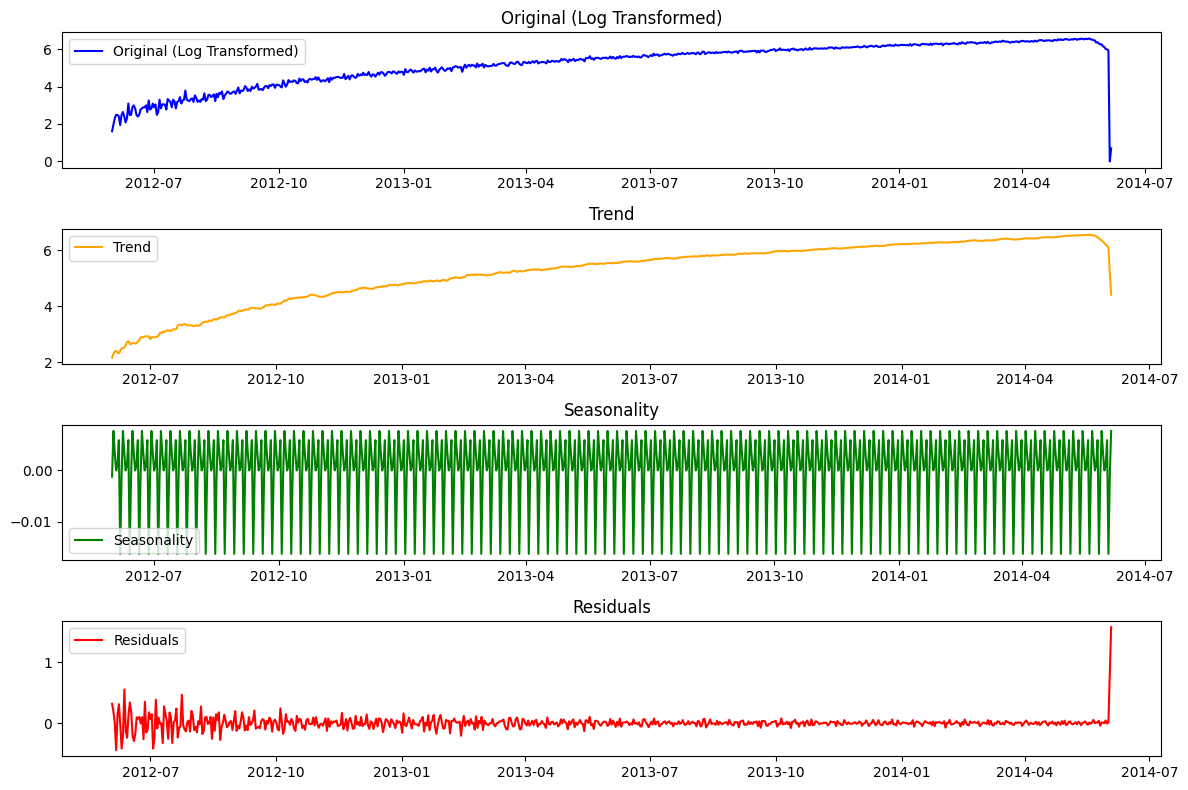

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Resample to Daily Counts
time_series = df_engagement.set_index('time_stamp').resample('D').size()

# Log Transformation to stabilize variance
log_series = np.log1p(time_series)  # Use log1p to handle zeros

# Step 1: Decompose the time series
decomposition = seasonal_decompose(log_series, model='additive', period=7)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid.dropna()

# Step 2: Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(log_series, label='Original (Log Transformed)', color='blue')
plt.title('Original (Log Transformed)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

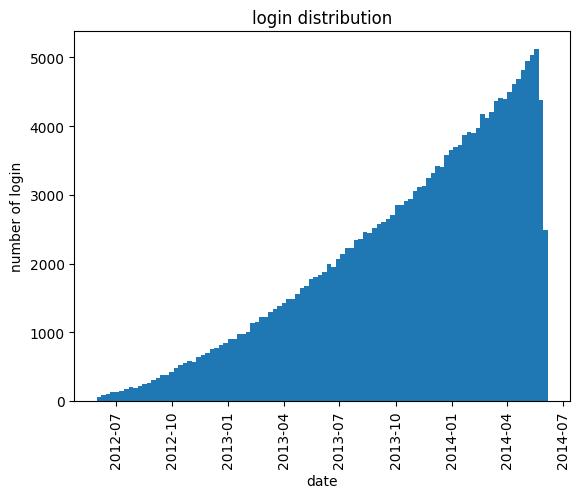

In [146]:
login2 = df_engagement['15_min_interval']

_ = plt.hist(login2, bins=100)
_ = plt.xlabel('date')
_ = plt.ylabel('number of login')
_ = plt.xticks(rotation=90)
_ = plt.title('login distribution')

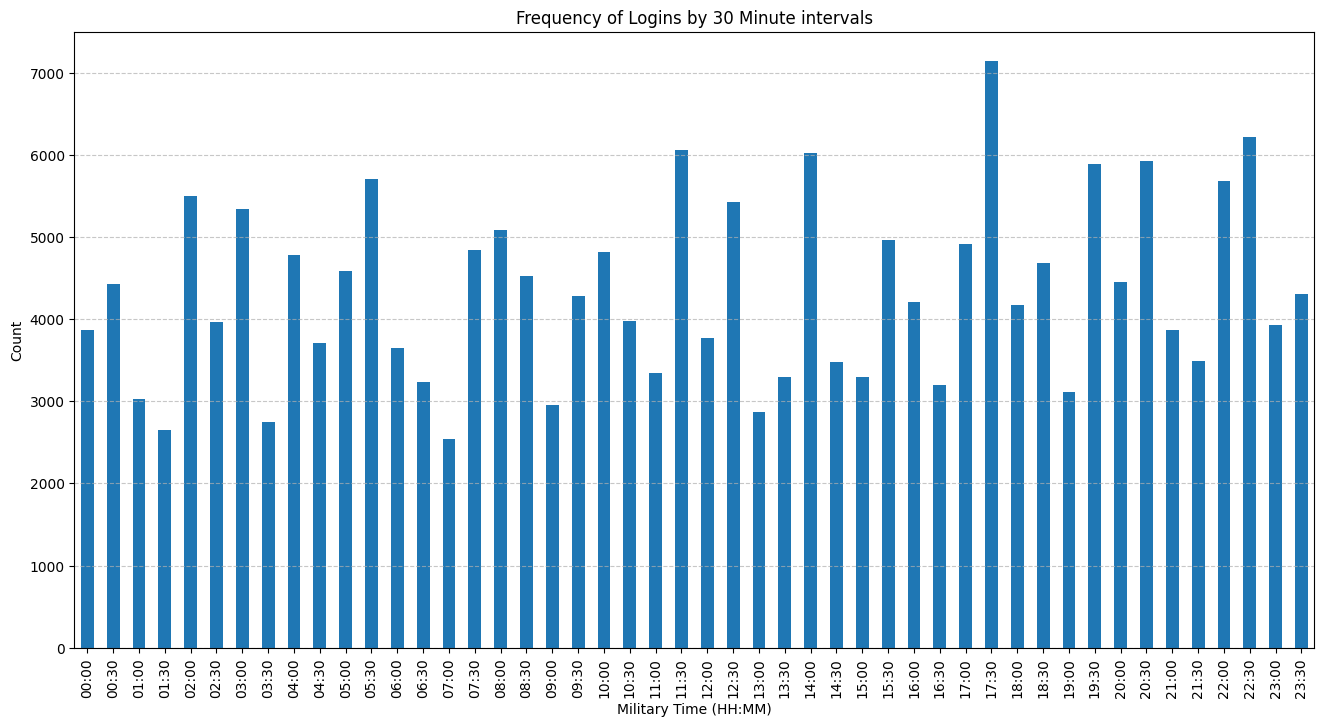

In [148]:
# group by hours and 15 min intervals 
grouped_ = login2.dt.strftime('%H:%M').value_counts().sort_index() #Group by unique hour and minute values and counts how many times each occurs.

# Plot the grouped data
plt.figure(figsize=(16, 8))
grouped_.plot(kind='bar')
plt.title("Frequency of Logins by 30 Minute intervals")
plt.xlabel("Military Time (HH:MM)", fontsize= 10)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
#Trends in days of the week
#Extract days of the week

df_engagement['day_of_week'] = df_engagement['time_stamp'].dt.dayofweek

In [52]:
day_of_week = df_engagement['day_of_week']

In [53]:
day_of_week.value_counts()

day_of_week
1    29784
6    29774
2    29742
4    29730
5    29728
0    29711
3    29448
Name: count, dtype: int64

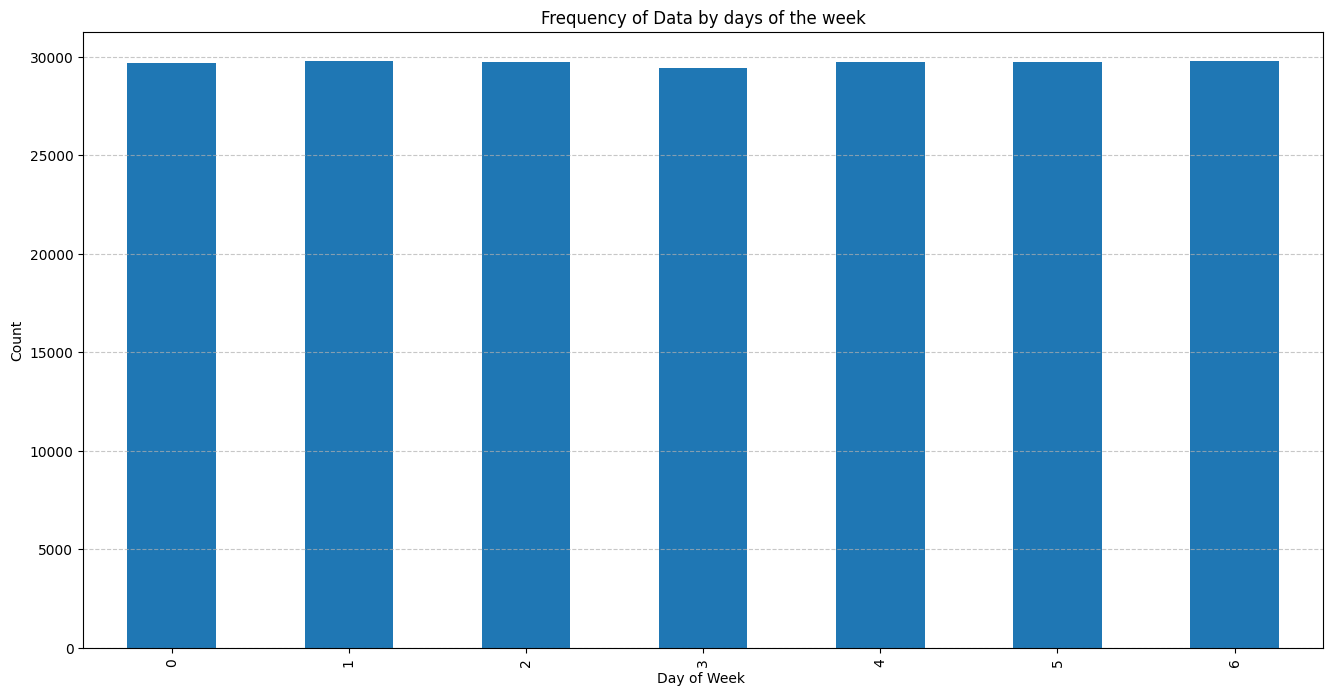

In [54]:
# group by day of week 
grouped_day_of_week = day_of_week.value_counts().sort_index() #Group by unique hour and minute values and counts how many times each occurs.

# Plot the grouped data
plt.figure(figsize=(16, 8))
grouped_day_of_week.plot(kind='bar')
plt.title("Frequency of Data by days of the week")
plt.xlabel("Day of Week ", fontsize= 10)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [55]:
df_engagement.head()

,time_stamp,user_id,visited,has_3_visits,15_min_interval,day_of_week
0,2014-04-22 03:53:30,1,1,False,2014-04-22 03:45:00,1
1,2013-11-15 03:45:04,2,1,False,2013-11-15 03:45:00,4
2,2013-11-29 03:45:04,2,1,False,2013-11-29 03:45:00,4
3,2013-12-09 03:45:04,2,1,False,2013-12-09 03:45:00,0
4,2013-12-25 03:45:04,2,1,False,2013-12-25 03:45:00,2


In [56]:
#Trends in months 
#Trends in days of the week
#Extract days of the week

df_engagement['month'] = df_engagement['time_stamp'].dt.month

In [57]:
df_engagement.head()

,time_stamp,user_id,visited,has_3_visits,15_min_interval,day_of_week,month
0,2014-04-22 03:53:30,1,1,False,2014-04-22 03:45:00,1,4
1,2013-11-15 03:45:04,2,1,False,2013-11-15 03:45:00,4,11
2,2013-11-29 03:45:04,2,1,False,2013-11-29 03:45:00,4,11
3,2013-12-09 03:45:04,2,1,False,2013-12-09 03:45:00,0,12
4,2013-12-25 03:45:04,2,1,False,2013-12-25 03:45:00,2,12


In [58]:
df_engagement.dtypes

time_stamp         datetime64[ns]
user_id                     int64
visited                     int64
has_3_visits                 bool
15_min_interval    datetime64[ns]
day_of_week                 int32
month                       int32
dtype: object

In [59]:
df_engagement['time_stamp'].max()

Timestamp('2014-06-06 14:58:50')

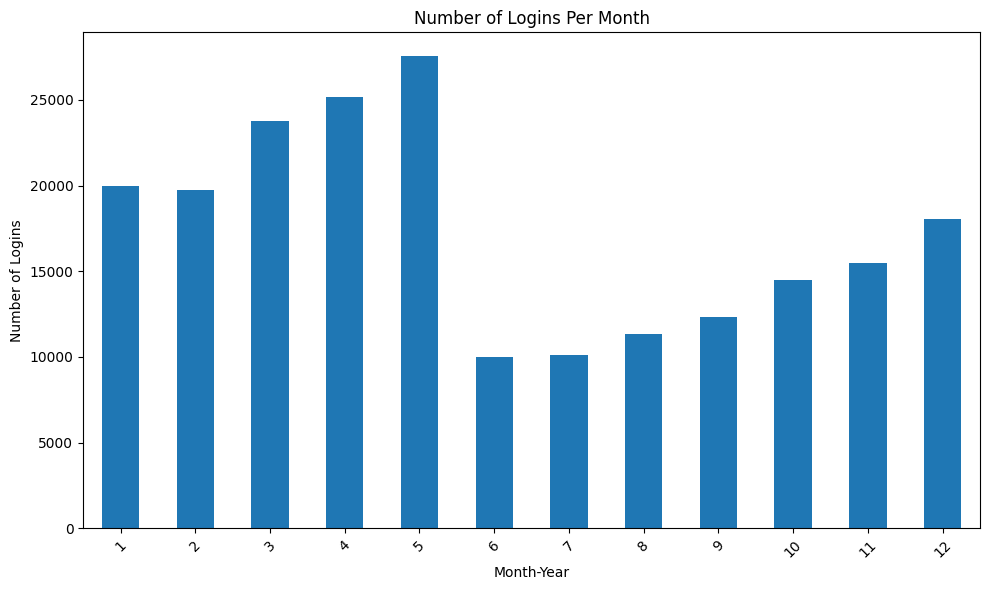

In [60]:
# Count logins per month
monthly_logins = df_engagement.groupby('month').size()

# Create the visualization
plt.figure(figsize=(10, 6))
monthly_logins.plot(kind='bar', rot=45)
plt.title('Number of Logins Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.show()

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_78472/377407955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['year_month'] = df_2013['time_stamp'].dt.to_period('M')


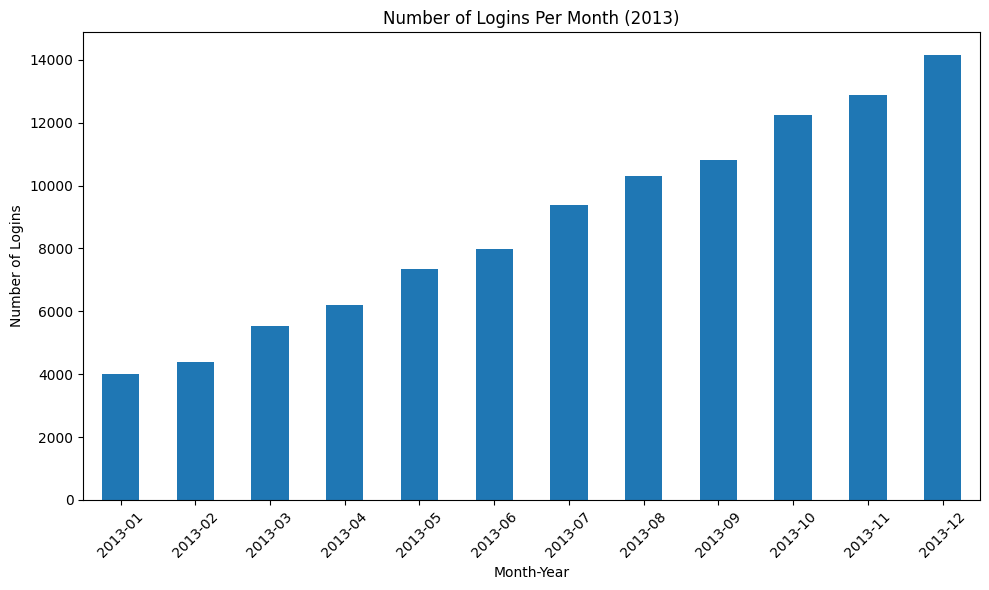

In [61]:
df_2013 = df_engagement[(df_engagement['time_stamp'] >= '2013-01-01') & (df_engagement['time_stamp'] <= '2013-12-31')]
# Filter data for the year 2013
df_2013['year_month'] = df_2013['time_stamp'].dt.to_period('M')


#df_2013['year_month'] = df_2013[(df_engagement['time_stamp'] >= '2013-01-01') & (df_engagement['time_stamp'] <= '2013-12-31')]

# Recalculate monthly logins for 2013
monthly_logins_2013 = df_2013.groupby('year_month').size()

# Create the visualization for 2013
plt.figure(figsize=(10, 6))
monthly_logins_2013.plot(kind='bar', rot=45)
plt.title('Number of Logins Per Month (2013)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.show()


In [62]:
df_engagement.head()

,time_stamp,user_id,visited,has_3_visits,15_min_interval,day_of_week,month
0,2014-04-22 03:53:30,1,1,False,2014-04-22 03:45:00,1,4
1,2013-11-15 03:45:04,2,1,False,2013-11-15 03:45:00,4,11
2,2013-11-29 03:45:04,2,1,False,2013-11-29 03:45:00,4,11
3,2013-12-09 03:45:04,2,1,False,2013-12-09 03:45:00,0,12
4,2013-12-25 03:45:04,2,1,False,2013-12-25 03:45:00,2,12


In [63]:
df_join = df_engagement[['user_id','has_3_visits']]

In [64]:
df_join.head()

,user_id,has_3_visits
0,1,False
1,2,False
2,2,False
3,2,False
4,2,False


In [65]:
df_join.info

<bound method DataFrame.info of         user_id  has_3_visits
0             1         False
1             2         False
2             2         False
3             2         False
4             2         False
...         ...           ...
207912    11996         False
207913    11997         False
207914    11998         False
207915    11999         False
207916    12000         False

[207917 rows x 2 columns]>

# Join df_join and df so that df has the column 'has_3_visits' which will be the target variable for modeling. 

In [66]:
merged_df = pd.merge(df, df_join, on='user_id', how='left')

In [67]:
merged_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time,has_3_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False


In [68]:
merged_df.rename(columns={'has_3_visits':'adopted_user'}, inplace=True)

In [69]:
merged_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False


# Step 3
## Pseudo Code:

- Preprocessing: Transform data to prepare for ML modeling.

- Scale data:

- Use correlation matrix to spot correlated features:

- Train_Test_Split: Use stratify = 'y' if dataset is imbalanced.

 

In [70]:
merged_df.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
last_login_time               datetime64[ns]
adopted_user                          object
dtype: object

# Preprocessing

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [72]:
# Handle datetime features
merged_df['creation_time'] = pd.to_datetime(merged_df['creation_time'])
merged_df['last_login_time'] = pd.to_datetime(merged_df['last_login_time'])
merged_df['account_age'] = (pd.Timestamp.now() - merged_df['creation_time']).dt.days
merged_df['days_since_last_login'] = (pd.Timestamp.now() - merged_df['last_login_time']).dt.days

# Create binary flag for invited users
merged_df['is_invited'] = merged_df['invited_by_user_id'].notnull().astype(int)

In [73]:
merged_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_login_time,adopted_user,account_age,days_since_last_login,is_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,2014-04-22 03:53:30,False,3896,3896.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False,4054,3918.0,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False,4054,3918.0,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False,4054,3918.0,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,2014-03-31 03:45:04,False,4054,3918.0,1


In [74]:
merged_df['adopted_user'].value_counts()

adopted_user
True     160522
False     47395
Name: count, dtype: int64

In [75]:
merged_df.drop(columns=['user_id','creation_time','name','email','last_login_time'],inplace=True)

In [76]:
merged_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,account_age,days_since_last_login,is_invited
0,GUEST_INVITE,1,0,11,10803.0,False,3896,3896.0,1
1,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
2,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
3,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
4,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1


### Categorical 

name                                  object


email                                 object


creation_source                       object


adopted_user                          object

In [77]:
merged_df.isna().sum()

creation_source                   0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            92566
adopted_user                   3177
account_age                       0
days_since_last_login          3177
is_invited                        0
dtype: int64

In [78]:
merged_df['adopted_user'].value_counts()

adopted_user
True     160522
False     47395
Name: count, dtype: int64

In [79]:
merged_df['invited_by_user_id'] = merged_df['invited_by_user_id'].fillna(0)

In [80]:
merged_df.isna().sum()

creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                  3177
account_age                      0
days_since_last_login         3177
is_invited                       0
dtype: int64

In [81]:
merged_df = merged_df.dropna(subset=['adopted_user','days_since_last_login'])

In [82]:
merged_df.isna().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
account_age                   0
days_since_last_login         0
is_invited                    0
dtype: int64

In [83]:
merged_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,account_age,days_since_last_login,is_invited
0,GUEST_INVITE,1,0,11,10803.0,False,3896,3896.0,1
1,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
2,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
3,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1
4,ORG_INVITE,0,0,1,316.0,False,4054,3918.0,1


In [84]:
merged_df.dtypes

creation_source                object
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                   object
account_age                     int64
days_since_last_login         float64
is_invited                      int64
dtype: object

In [85]:
merged_df.isna().sum()

creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
account_age                   0
days_since_last_login         0
is_invited                    0
dtype: int64

In [86]:
merged_df = pd.get_dummies(merged_df, columns=['creation_source'])

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['invited_by_user_id','org_id','invited_by_user_id','days_since_last_login','account_age']

merged_df[numeric_features] = scaler.fit_transform(merged_df[numeric_features])

In [88]:
merged_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,account_age,days_since_last_login,is_invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,-1.265342,1.941546,False,-2.662126,0.153060,1,True,False,False,False,False
1,0,0,-1.347874,-0.793103,False,-1.750218,0.382244,1,False,True,False,False,False
2,0,0,-1.347874,-0.793103,False,-1.750218,0.382244,1,False,True,False,False,False
3,0,0,-1.347874,-0.793103,False,-1.750218,0.382244,1,False,True,False,False,False
4,0,0,-1.347874,-0.793103,False,-1.750218,0.382244,1,False,True,False,False,False


In [89]:
merged_df.dtypes

opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                                float64
invited_by_user_id                    float64
adopted_user                           object
account_age                           float64
days_since_last_login                 float64
is_invited                              int64
creation_source_GUEST_INVITE             bool
creation_source_ORG_INVITE               bool
creation_source_PERSONAL_PROJECTS        bool
creation_source_SIGNUP                   bool
creation_source_SIGNUP_GOOGLE_AUTH       bool
dtype: object

In [92]:
merged_df['adopted_user'].dtypes

dtype('O')

In [93]:
merged_df['adopted_user'] = merged_df['adopted_user'].astype(int)


In [95]:
merged_df['adopted_user'].value_counts()

adopted_user
1    160522
0     47395
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

X = merged_df.drop(columns=['adopted_user'])  # Features
y = merged_df['adopted_user']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [97]:
merged_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,account_age,days_since_last_login,is_invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,-1.265342,1.941546,0,-2.662126,0.153060,1,True,False,False,False,False
1,0,0,-1.347874,-0.793103,0,-1.750218,0.382244,1,False,True,False,False,False
2,0,0,-1.347874,-0.793103,0,-1.750218,0.382244,1,False,True,False,False,False
3,0,0,-1.347874,-0.793103,0,-1.750218,0.382244,1,False,True,False,False,False
4,0,0,-1.347874,-0.793103,0,-1.750218,0.382244,1,False,True,False,False,False


In [98]:
corr_matrix = merged_df.corr()

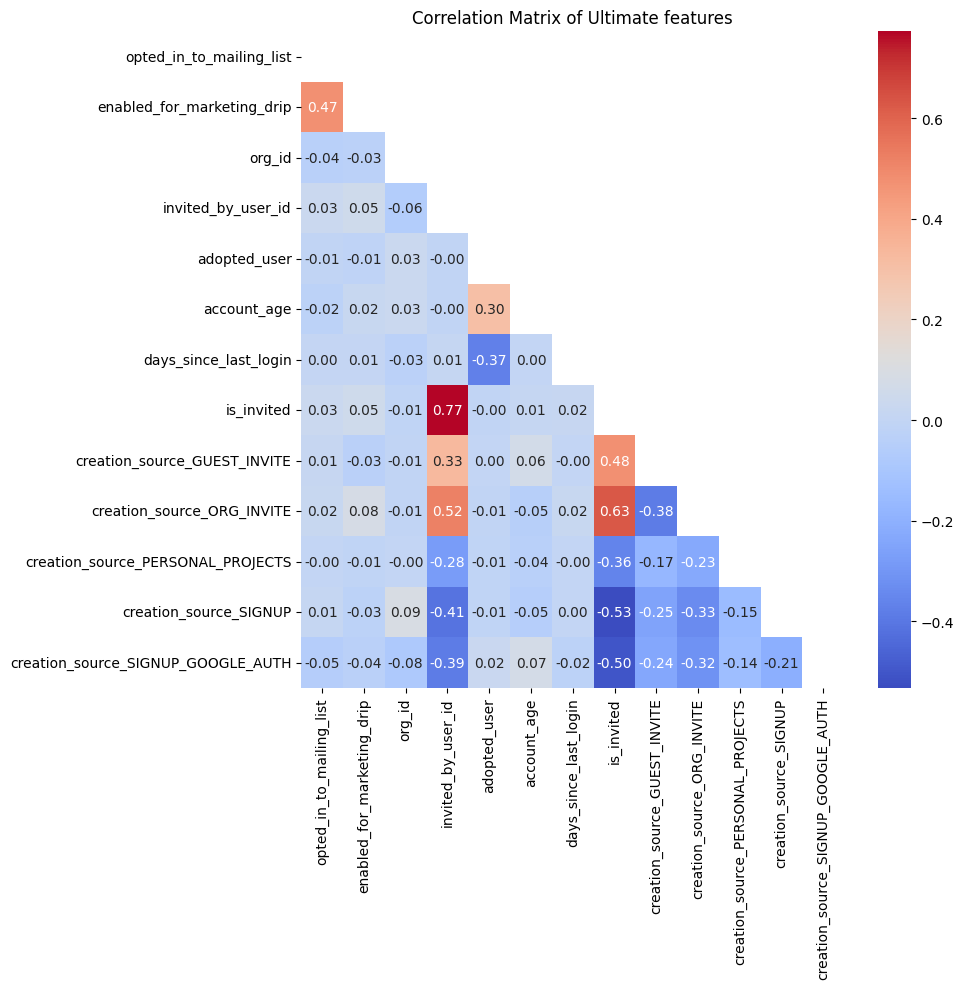

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

#Mask to truncate heatmap to reduce reduncancy of data visulaization. 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",mask=mask)

plt.title('Correlation Matrix of Ultimate features')

plt.tight_layout()
plt.show()

merged_df.head()

# Step 4

## Pseudo Code:

- Use classification models such as log_reg, random forest and Xgboost.

- Hyperparameter tunning: Baysearch 

- Use AUC curve to identify which metric is most important: Preccission or Recall.

In [100]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge 

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

#Random Search 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import uniform


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [101]:
! pip install xgboost

from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

Test Accuracy: 0.7879713351288957
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.72      0.61      9479
           1       0.91      0.81      0.85     32105

    accuracy                           0.79     41584
   macro avg       0.72      0.76      0.73     41584
weighted avg       0.82      0.79      0.80     41584



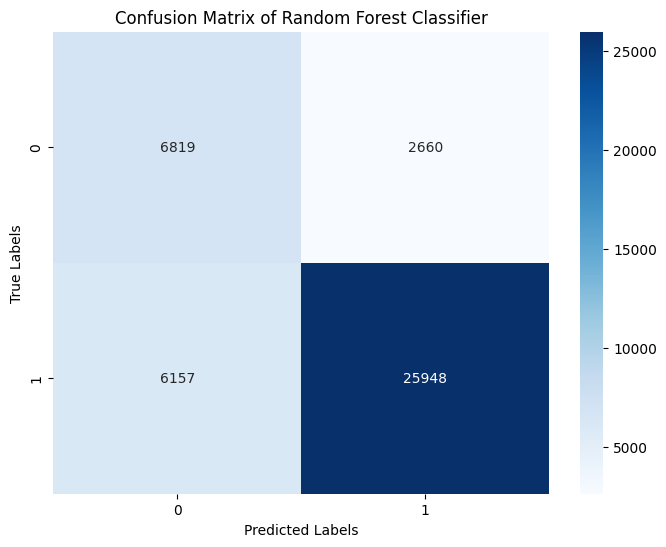

In [103]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight="balanced",random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [104]:
! pip install scikit-optimize


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [105]:
from skopt import BayesSearchCV

In [106]:
# Define the parameter search space
param_space = {
    'n_estimators': (50, 300),                   # Number of trees in the forest
    'max_depth': (5, 20),                        # Depth of each tree
    'min_samples_split': (2, 10),                # Minimum samples required to split an internal node
    'min_samples_leaf': (1, 4),                  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up the Bayesian Optimization with cross-validation (cv=5)
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=32,                  # Number of iterations (I will try 25 to start, then adjust as needed)
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Scoring metric (you can adjust based on goals)
    n_jobs=-1,                  # Use all processors
    verbose=2,
    random_state=22
)

# Fit the BayesSearchCV
bayes_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Score:", bayes_search.best_score_)

# Use the best model to predict on the test set
best_rf_model = bayes_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   8.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   8.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   8.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   8.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   8.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=  28.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=291; total time=  28.0s
[CV] END max_depth=8, max_features=sqrt, min_samp

# Baysearch results

Best Parameters: OrderedDict({'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300})
Best Cross-Validation Score: 0.8438193327995723
Test Accuracy: 0.8436417853020393
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.43      0.55      9479
           1       0.85      0.97      0.91     32105

    accuracy                           0.84     41584
   macro avg       0.82      0.70      0.73     41584
weighted avg       0.84      0.84      0.83     41584

# Best RF model metrics

Test Accuracy: 0.8436417853020393
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.43      0.55      9479
           1       0.85      0.97      0.91     32105

    accuracy                           0.84     41584
   macro avg       0.82      0.70      0.73     41584
weighted avg       0.84      0.84      0.83     41584



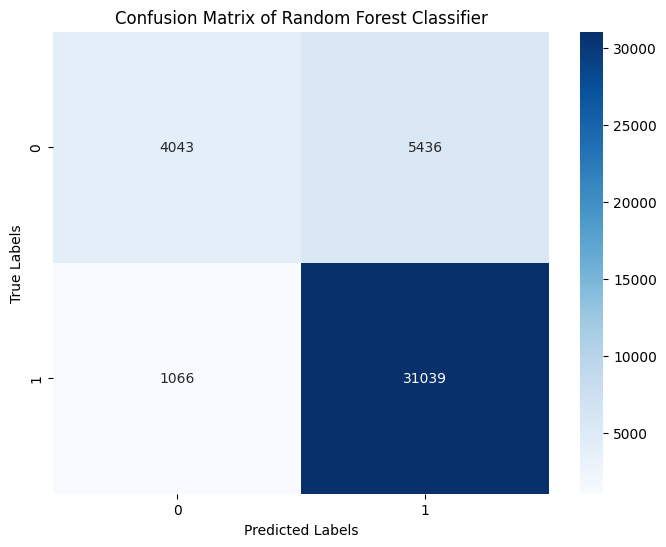

In [112]:
# Initialize the Random Forest Classifier with some basic parameters
# You can adjust n_estimators (number of trees) and max_depth (depth of each tree) for tuning
best_rf_model = RandomForestClassifier(n_estimators=300, max_depth=19, max_features='log2', min_samples_leaf=4, min_samples_split=10,random_state=42) # Adding (class_weight="balanced") significantly improved results!

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title("Confusion Matrix of Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature Importance

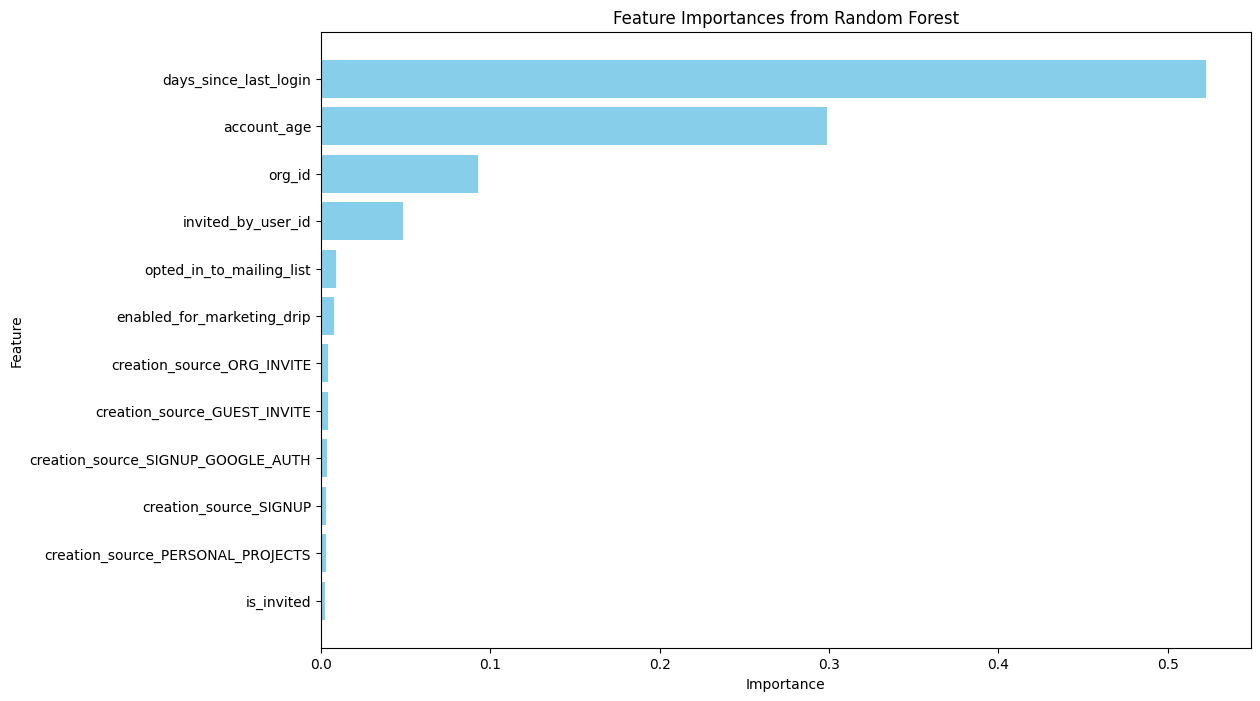

In [113]:
# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()